<a href="https://colab.research.google.com/github/inderaihsan/Linear-Regression/blob/main/Adjusted_R_squared_meaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm 
import seaborn as sns
import matplotlib.pyplot as py 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
df=pd.read_csv('/content/1.02. Multiple linear regression.csv') 
df.head()

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2


In [6]:
df.corr()

,SAT,GPA,"Rand 1,2,3"
SAT,1.000000,0.637184,-0.031722
GPA,0.637184,1.000000,-0.046224
"Rand 1,2,3",-0.031722,-0.046224,1.000000


In [7]:
df.describe()

,SAT,GPA,"Rand 1,2,3"
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,2.059524
std,104.530661,0.271617,0.855192
min,1634.000000,2.400000,1.000000
25%,1772.000000,3.190000,1.000000
50%,1846.000000,3.380000,2.000000
75%,1934.000000,3.502500,3.000000
max,2050.000000,3.810000,3.000000


In [21]:
y=df['GPA'] 
x1=df[['SAT' , 'Rand 1,2,3']]  
x=sm.add_constant(x1)
result=sm.OLS(y,x).fit() 

Compared to the last linear regression with a single feature, we have a bigger R squared error, but the Adjusted R-squared is less than before. Adjusted R squared penalizes the presence of unnecesary predictor. 

In [23]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     27.76
Date:                Tue, 26 Jan 2021   Prob (F-statistic):           6.58e-10
Time:                        18:08:15   Log-Likelihood:                 12.720
No. Observations:                  84   AIC:                            -19.44
Df Residuals:                      81   BIC:                            -12.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2960      0.417      0.710      0.480      -0.533       1.125
SAT            0.0017      0.000      7.432      0.000       0.001       0.002
Rand 1,2,3    -0.0083      0.027     -0.304      0.762      -0.062       0.046
==============================================================================
Omnibus:                       12.992   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.364
Skew:                          -0.731   Prob(JB):                     0.000280
Kurtosis:                       4.594   Cond. No.                     3.33e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

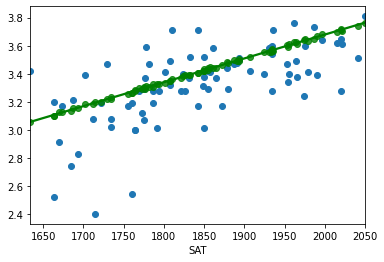

In [51]:
py.scatter(df['SAT'], y) 
result=0.2960+0.0017*df['SAT']+df['Rand 1,2,3']*(-0.0083)
sns.regplot(x=df['SAT'] , y=result, color='green') 